# Wetterdaten von 1950 bis (fast) heute: Analysieren

In [94]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## [1 Punkt] Einlesen des bereinigten Datensatzes

Lesen Sie den bereinigten Datensatz aus der Datei `produkt_tu_stunde_19500101_20221231_01639_bereinigt.csv` in einen `pd.DataFrame` ein. Dieser Datensatz basiert auf Daten des Deutschen Wetterdienstes, die dieser unter `https://opendata.dwd.de/` bereitstellt, wurde aber bereinigt, damit diese Aufgabe komplett unabhängig von der Aufgabe `Wetterdaten_vorbereiten` bearbeitet werden kann.

Insbesondere sollen Sie die Spalte `Datum` als Index mit Einträgen vom Typ `np.datetime64[ns]` einlesen. Nutzen Sie dazu die [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)-Funktion  unter Angabe von `index_col` und `parse_dates=True`.

In [95]:
wetterdaten = pd.read_csv("produkt_tu_stunde_19500101_20221231_01639_bereinigt.csv", index_col="Datum", parse_dates=True)
wetterdaten

,Temperatur,Luftfeuchte
Datum,,
1950-01-01 00:00:00+00:00,-3.6,74.0
1950-01-01 01:00:00+00:00,-3.5,74.0
1950-01-01 02:00:00+00:00,-3.5,73.0
1950-01-01 03:00:00+00:00,-4.2,74.0
1950-01-01 04:00:00+00:00,-4.3,74.0
...,...,...
2022-12-31 19:00:00+00:00,13.7,71.0
2022-12-31 20:00:00+00:00,14.0,67.0
2022-12-31 21:00:00+00:00,14.6,62.0


## [2 Punkte] Probleme der Visualisierung mit Histogrammen und `value_counts`

Für die explorative Datenanalyse sind Histogramme und Plots der `value_counts` möglicherweise gut geeignet, aber zur Visualisierung nicht immer. Insbesondere können abhängig von der Datenquelle in Ihrer Darstellung Artefakte auftreten.

Stellen Sie die bereinigten Messwerte der Luftfeuchtigkeit als Histogramm, sowie die `value_counts` der bereinigten Temperaturdaten als Scatterplot dar. Variieren Sie die Anzahl der `bins` des Histogramms. Welche Artefakte fallen Ihnen jeweils auf? Welche Ursachen könnte dies haben?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temperatur  581 non-null    float64
 1   Count       581 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 9.2 KB


<Axes: xlabel='Luftfeuchte', ylabel='Temperatur'>

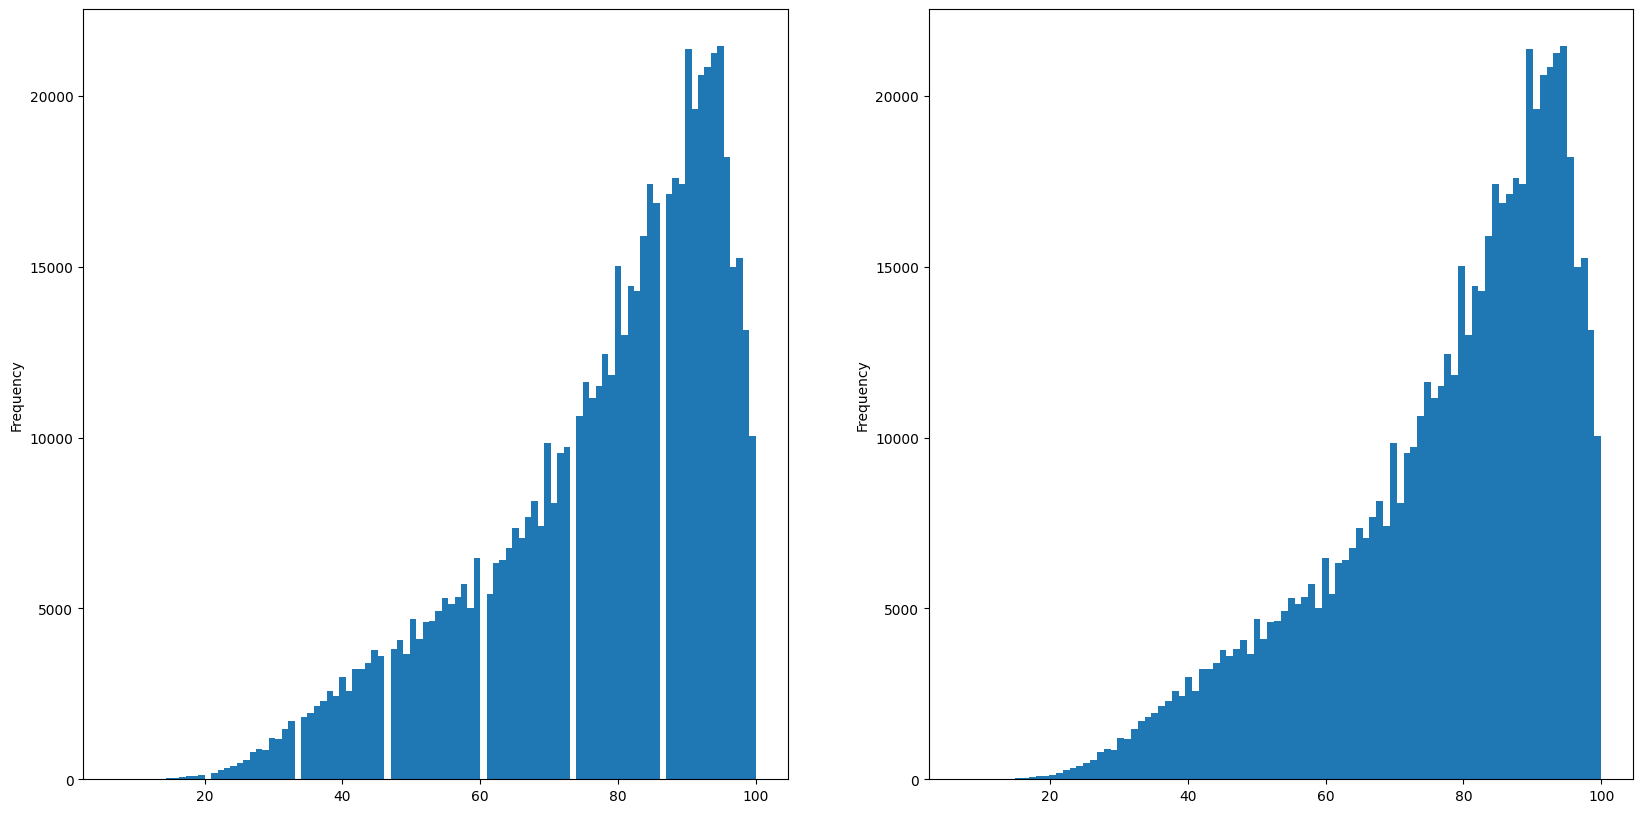

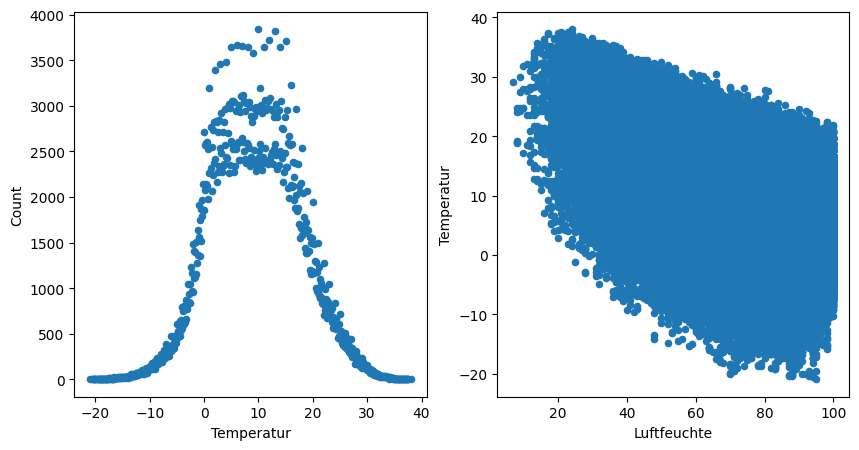

In [96]:
# create a subplot with 2 rows and 3 columns
fig , axes = plt.subplots(1, 2, figsize=(20, 10))

# try different bin sizes
wetterdaten['Luftfeuchte'].plot(kind='hist',
                 ax=axes[0],
                 bins=100)
wetterdaten['Luftfeuchte'].plot(kind='hist',
                 ax=axes[1],
                 bins=wetterdaten["Luftfeuchte"].unique().size)

'''Teilt man die Werte in 100 Bins auf, so sind fehlende Werte zu erkennen. Dies entsteht dadurch, dass die Luftfeuchtigkeit nur Werte zwischen 7 und 100 annimmt.
   Dadurch werden die 100 bins auf 94 Werte aufgeteilt und somit gibt es 6 bins, die keine Werte enthalten.
   Passt man die Binanzahl auf die Anzahl der einzigartigen Werte an, so werden alle Werte in einen Bin gepackt und es entsteht ein Artefaktloses Histogramm.'''

# create a subplot with 1 row and 2 columns
fig1, ax = plt.subplots(1, 2, figsize=(10, 5))

# create a new dataframe with the temperature values and their counts
temp_values = pd.DataFrame(data=zip(wetterdaten['Temperatur'].value_counts().index, wetterdaten['Temperatur'].value_counts()), columns=["Temperatur", "Count"])
temp_values.info()

# plot the temperature values
temp_values.plot(kind='scatter',
                 ax = ax[0],
                 x='Temperatur',
                 y='Count')
wetterdaten.plot(kind='scatter',
                 ax= ax[1],
                 x='Luftfeuchte',
                 y='Temperatur')



## [3 Punkte] Saisonalität der Temperatur und Luftfeuchtigkeit

Temperatur und Luftfeuchtigkeit sind *saisonale* Größen, sie ändern sich also einigermaßen vorhersagbar im Verlauf eines Jahres (auf der Nordhalbkugel ist es normalerweise im Juni wärmer als im Januar). Diese Saisonalität sollen Sie als erstes visualisieren. Beide Größen schwanken jedoch auch im Tagesverlauf — diese Periodizität interessiert uns hier aber nicht. Überlegen Sie insbesondere, wie Sie dies berücksichtigen.

Stellen Sie für die Monate Januar bis Dezember die *Verteilung* beider Größen über die Jahre hinweg in separaten Plots dar. Auf der Ordinate soll der Monat aufgetragen werden, auf der Abszisse die jeweilige Messgröße. Wählen Sie eine sinnvolle Darstellungsform, die nicht nur Mittelwert und Standardabweichung, sondern die tatsächliche Verteilung der Werte darstellt. Zum Beispiel könnten Sie einen Boxplot (`plt.boxplot`) oder einen Violinplot (`plt.violin`) nutzen.

*Hinweis*: Die `pd.DataFrame.groupby`-Methode könnte sich als nützlich erweisen.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f41d98c1c60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f41d98c25f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f41d98c04f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f41d98c3490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f41d98c3fd0>,
 'means': []}

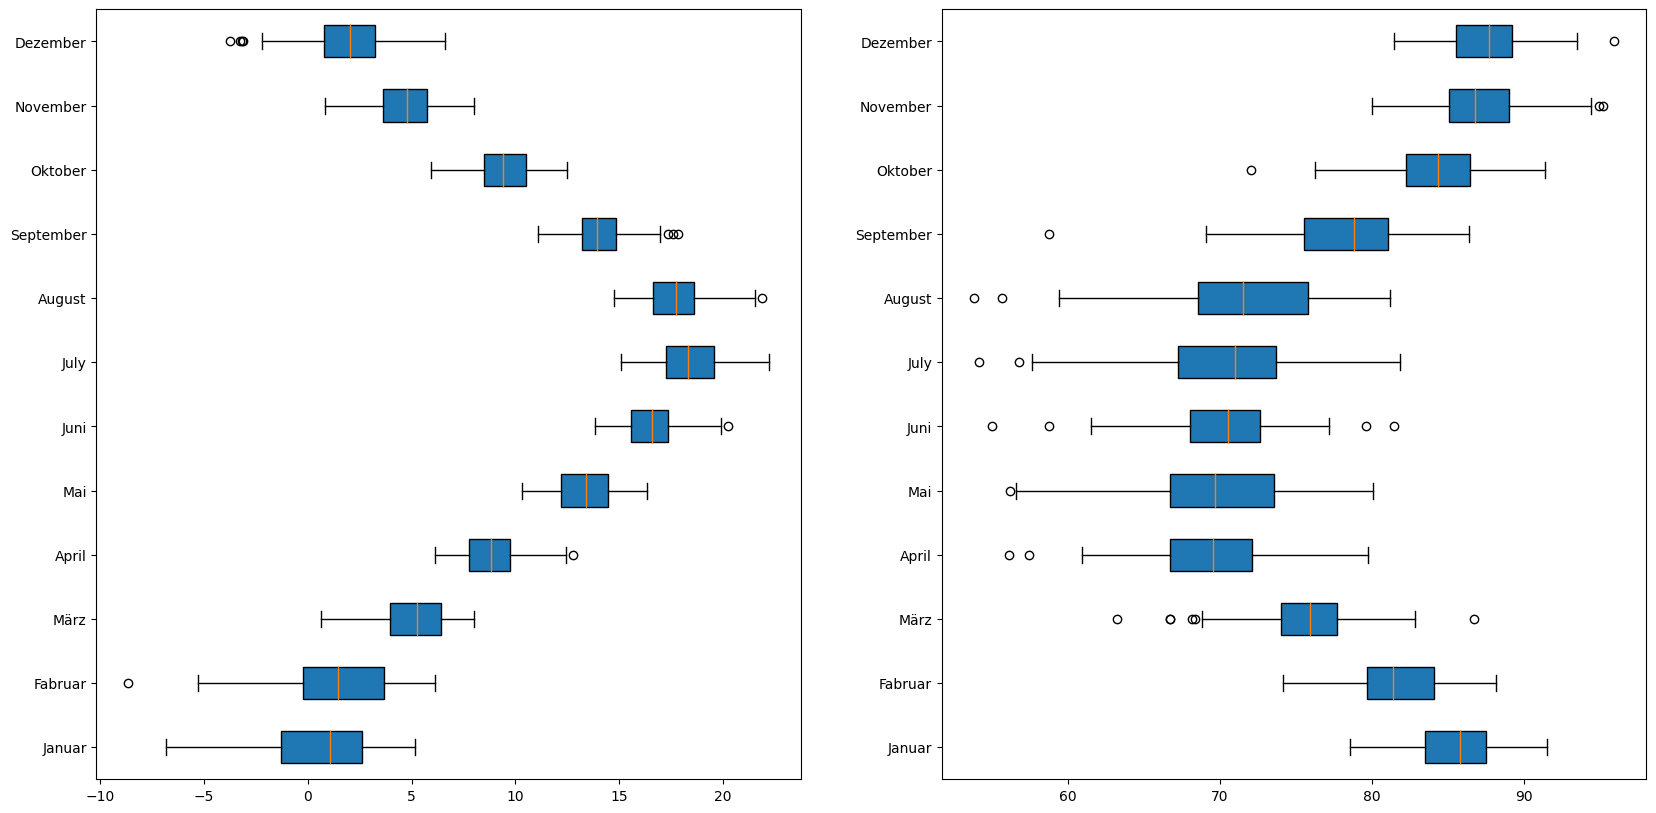

In [97]:
grouped_weather = wetterdaten.groupby([wetterdaten.index.year.rename('year'), wetterdaten.index.month.rename('month')]).mean() # group by year and month
monthly_weather = grouped_weather.groupby('month') # group by month

# create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20,10))

# labels for the boxplots
labels = ['Januar', 'Fabruar', 'März', 'April',
            'Mai', 'Juni', 'July', 'August',
            'September', 'Oktober', 'November', 'Dezember'] 

# get the temperature data for the boxplots
data_temp = [monthly_weather.get_group(mon+1)['Temperatur'] for mon in range(12)] 

# get the humidity data for the boxplots
data_luft = [monthly_weather.get_group(mon+1)['Luftfeuchte'] for mon in range(12)] 

# create the boxplots
axes[0].boxplot(data_temp, vert=False, patch_artist=True, labels=labels)
axes[1].boxplot(data_luft, vert=False, patch_artist=True, labels=labels)
    



## [4 Punkte] Langfristige Veränderung der Jahrestemperatur

Infolge der Erhitzung der Erde in den letzten Jahrzehnten, die in weiten Teilen der Welt bereits katastrophale Auswirkungen zeigt, hat sich auch das Klima in Gießen verändert. Stellen Sie diese Veränderung grafisch dar. Dabei ist die genaue Art der Darstellung Ihnen überlassen. Lassen Sie sich gerne z.B. von [anderen Darstellungen](https://en.wikipedia.org/wiki/Climate_change_art) inspirieren.

        Januar   Fabruar      März     April       Mai      Juni      Juli   
1950 -1.093899  2.163021  0.464895 -1.526787  0.983184  1.324506  0.030527  \
1951  2.125725  1.529985 -1.591825 -1.404565 -1.032542 -0.877855 -0.304016   
1952  0.026666 -1.129016 -0.842766  2.105852  0.151866 -0.002994  1.221387   
1953 -1.053576 -0.710491  1.026723  0.961963  1.120280  0.077840 -0.488425   
1954 -3.043496 -3.457813  0.558578 -1.522620 -0.265472  0.085201 -3.240575   
...        ...       ...       ...       ...       ...       ...       ...   
2018  3.756908 -2.875521 -1.638465  3.844880  3.112081  1.662145  2.897865   
2019  0.398305  2.225223  1.989895  1.220019 -1.907273  3.364506  1.071252   
2020  2.691854  3.865812  1.160191  2.028213 -0.591548  0.641451  0.356468   
2021  0.712015  0.061681  0.259250 -2.660120 -2.442489  2.738256 -0.267995   
2022  2.371961  3.263021  0.808444 -0.462481  1.878345  2.301173  1.364983   

        August  September   Oktober  November  Dezember  
1950 

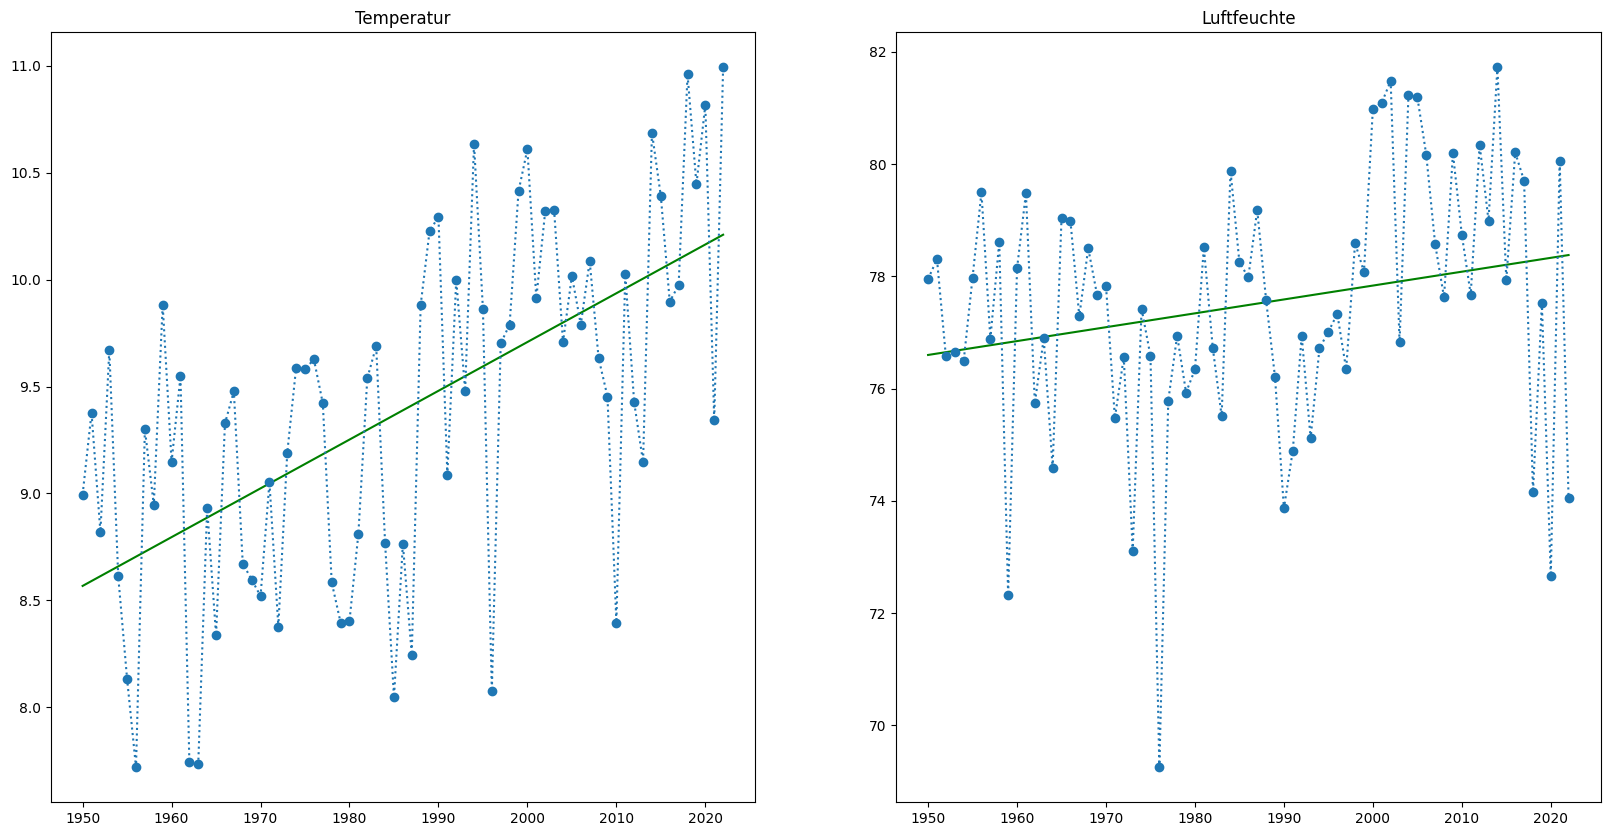

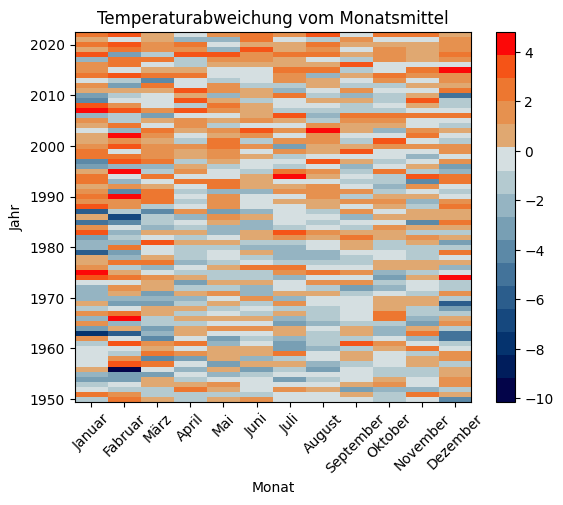

In [174]:
from scipy import stats
from matplotlib.patches import Rectangle
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.collections import LineCollection, PatchCollection

''' Creating a linear regression line for the yearly mean temperature and humidity '''
# group by year and calculate the mean
yearly_weather = wetterdaten.groupby(wetterdaten.index.year).mean()

# calculate the linear regression
reg_temp = stats.linregress(yearly_weather.index, yearly_weather['Temperatur'])
reg_luft = stats.linregress(yearly_weather.index, yearly_weather['Luftfeuchte'])

# create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20,10))


# plot the data and the regression line
axes[0].plot(yearly_weather.index, reg_temp.intercept + reg_temp.slope*yearly_weather.index, 'g', label='fitted line')
axes[1].plot(yearly_weather.index, reg_luft.intercept + reg_luft.slope*yearly_weather.index, 'g', label='fitted line')

axes[0].plot(yearly_weather['Temperatur'], linestyle='dotted', marker='o')
axes[0].set_title('Temperatur')
axes[1].plot(yearly_weather['Luftfeuchte'], linestyle='dotted', marker='o')
axes[1].set_title('Luftfeuchte')


'''Creating a graphical plot to visualize the monthly diference in temperature to the mean temperature of the month'''

# group by year and month and calculate the mean
grouped_weather = wetterdaten.groupby([wetterdaten.index.year.rename('year'), wetterdaten.index.month.rename('month')]).mean()

# create a dataframe with the monthly temperature difference
temp_varianz = pd.DataFrame(index=range(1950, 2023), columns= ['Januar', 'Fabruar', 'März', 'April',
            'Mai', 'Juni', 'Juli', 'August',
            'September', 'Oktober', 'November', 'Dezember'], data= pd.NA)

# group by month
month_group = grouped_weather.groupby('month')

# calculate the difference to the mean temperature of the month
for idx, mon in enumerate(temp_varianz.columns):
    month= month_group.get_group(idx+1)['Temperatur']
    temp_varianz[mon] = month.values - month.mean()
    
# create a colormap that suits the data
cmap = ListedColormap([
    '#030449', '#001d5c', '#05336e', '#16487e',
    '#2b5d8c', '#43739a', '#5c89a7', '#789fb4',
    '#95b4c2', '#b4cad0', '#d5dfe1', '#e0a871',
    '#e6914f', '#ed7730', '#f55417', '#fc0808'
    ])

# create the figure
fig = plt.figure()  
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-0.5, 11.5), ylim=(-0.5, 72.5)) # create the axes for the rectangles and set the limits
ax.set_yticks(np.arange(0, 73, 10)) # set the yticks for the years
ax.set_xticks(np.arange(0, 12, 1)) # set the xticks for the months
ax.set_yticklabels(range(1950, 2023, 10)) # set the labels to the years in the data
ax.set_xticklabels(temp_varianz.columns, rotation=45) # set the labels to the months in the data

# set the labels
ax.set_title('Temperaturabweichung vom Monatsmittel')
ax.set_ylabel('Jahr')
ax.set_xlabel('Monat')

# create the rectangles
ax.imshow(temp_varianz, cmap=cmap, interpolation='nearest', aspect='auto')

# create the colorbar
plt.colorbar(plt.imshow(temp_varianz, cmap=cmap, interpolation='nearest', aspect='auto'), ax=ax, )
plt.show()